In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline
from qiskit.visualization import plot_bloch_vector

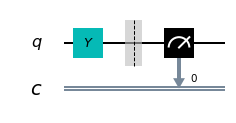

In [2]:
qc = QuantumCircuit(1,1)

qc.y(0)


qc.barrier()
qc.measure(0,0)

qc.draw(output='mpl')

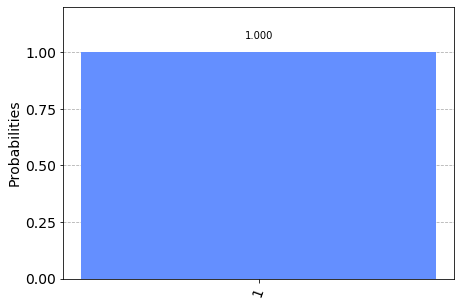

In [3]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [13]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator).result()
unitary = result.get_unitary()
print(unitary)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


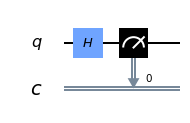

In [17]:
measure_x = QuantumCircuit(1,1)
measure_x.h(0);
measure_x.measure(0,0);
measure_x.draw(output='mpl')

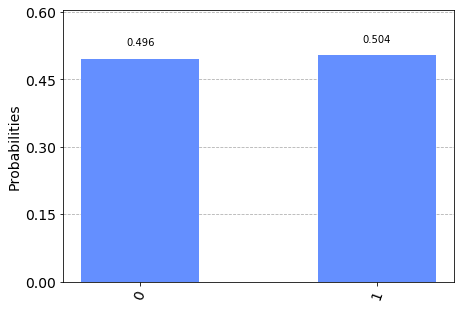

In [16]:
counts = execute(measure_x,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

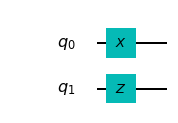

In [27]:
# set up circuit (no measurements required)
qc = QuantumCircuit(2)
qc.x(0) # qubits numbered from the right, so qubit 0 is the qubit on the right
qc.z(1) # and qubit 1 is on the left
qc.draw(output = 'mpl')

In [25]:
# set up simulator that returns unitary matrix
backend = Aer.get_backend('unitary_simulator')

# run the circuit to get the matrix
gate = execute(qc,backend).result().get_unitary()

# now we use some fanciness to display it in latex
from IPython.display import display, Markdown, Latex
gate_latex = '\\begin{pmatrix}'
for line in gate:
    for element in line:
        gate_latex += str(element) + '&'
    gate_latex  = gate_latex[0:-1]
    gate_latex +=  '\\\\'
gate_latex  = gate_latex[0:-2]
gate_latex += '\end{pmatrix}'
display(Markdown(gate_latex))

\begin{pmatrix}0j&(1+0j)&0j&0j\\(1+0j)&0j&0j&0j\\0j&0j&0j&(-1+0j)\\0j&0j&(-1+0j)&0j\end{pmatrix}